# Telco Churn Prediction

In [2]:
# Problem : Şirketi terk edecek müşterileri tahmin edebilecek bir makine öğrenmesi modeli geliştirilmesi istenmektedir.
# Modeli geliştirmeden önce gerekli olan veri analizi ve özellik mühendisliği adımlarını gerçekleştirmeniz beklenmektedir.

# Telco müşteri churn verileri, üçüncü çeyrekte Kaliforniya'daki 7043 müşteriye ev telefonu ve İnternet hizmetleri sağlayan
# hayali bir telekom şirketi hakkında bilgi içerir. Hangi müşterilerin hizmetlerinden ayrıldığını, kaldığını veya hizmete kaydolduğunu içermektedir.

# 21 Değişken 7043 Gözlem

# CustomerId : Müşteri İd’si
# Gender : Cinsiyet
# SeniorCitizen : Müşterinin yaşlı olup olmadığı (1, 0)
# Partner : Müşterinin bir ortağı olup olmadığı (Evet, Hayır) ? Evli olup olmama
# Dependents : Müşterinin bakmakla yükümlü olduğu kişiler olup olmadığı (Evet, Hayır) (Çocuk, anne, baba, büyükanne)
# tenure : Müşterinin şirkette kaldığı ay sayısı
# PhoneService : Müşterinin telefon hizmeti olup olmadığı (Evet, Hayır)
# MultipleLines : Müşterinin birden fazla hattı olup olmadığı (Evet, Hayır, Telefon hizmeti yok)
# InternetService : Müşterinin internet servis sağlayıcısı (DSL, Fiber optik, Hayır)
# OnlineSecurity : Müşterinin çevrimiçi güvenliğinin olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
# OnlineBackup : Müşterinin online yedeğinin olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
# DeviceProtection : Müşterinin cihaz korumasına sahip olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
# TechSupport : Müşterinin teknik destek alıp almadığı (Evet, Hayır, İnternet hizmeti yok)
# StreamingTV : Müşterinin TV yayını olup olmadığı (Evet, Hayır, İnternet hizmeti yok) Müşterinin, bir üçüncü taraf sağlayıcıdan televizyon programları yayınlamak için İnternet hizmetini kullanıp kullanmadığını gösterir
# StreamingMovies : Müşterinin film akışı olup olmadığı (Evet, Hayır, İnternet hizmeti yok) Müşterinin bir üçüncü taraf sağlayıcıdan film akışı yapmak için İnternet hizmetini kullanıp kullanmadığını gösterir
# Contract : Müşterinin sözleşme süresi (Aydan aya, Bir yıl, İki yıl)
# PaperlessBilling : Müşterinin kağıtsız faturası olup olmadığı (Evet, Hayır)
# PaymentMethod : Müşterinin ödeme yöntemi (Elektronik çek, Posta çeki, Banka havalesi (otomatik), Kredi kartı (otomatik))
# MonthlyCharges : Müşteriden aylık olarak tahsil edilen tutar
# TotalCharges : Müşteriden tahsil edilen toplam tutar
# Churn : Müşterinin kullanıp kullanmadığı (Evet veya Hayır) - Geçen ay veya çeyreklik içerisinde ayrılan müşteriler


# Her satır benzersiz bir müşteriyi temsil etmekte.
# Değişkenler müşteri hizmetleri, hesap ve demografik veriler hakkında bilgiler içerir.
# Müşterilerin kaydolduğu hizmetler - phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
# Müşteri hesap bilgileri – ne kadar süredir müşteri oldukları, sözleşme, ödeme yöntemi, kağıtsız faturalandırma, aylık ücretler ve toplam ücretler
# Müşteriler hakkında demografik bilgiler - cinsiyet, yaş aralığı ve ortakları ve bakmakla yükümlü oldukları kişiler olup olmadığı

In [3]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score, validation_curve, cross_validate
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)

warnings.simplefilter(action='ignore', category=Warning)

## Exploratory Data Analysis

### Genel Resim

In [6]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.shape

(7043, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.drop("customerID", axis=1, inplace = True)

In [10]:
df.describe(percentiles=[0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.000,0.00,0.000,0.0000,1.00,1.000,1.00
tenure,7043.0,32.371149,24.559481,0.00,1.0,1.000,9.00,29.000,55.0000,72.00,72.000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,19.2,19.650,35.50,70.350,89.8500,107.40,114.729,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,19.9,49.605,401.45,1397.475,3794.7375,6923.59,8039.883,8684.80
Churn,7043.0,0.265370,0.441561,0.00,0.0,0.000,0.00,0.000,1.0000,1.00,1.000,1.00


In [11]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
for col in df.columns:
    print("+++++++++++++++++++++")
    print(col)
    print(df[col].nunique())
    print(df[col].unique())

+++++++++++++++++++++
gender
2
['Female' 'Male']
+++++++++++++++++++++
SeniorCitizen
2
[0 1]
+++++++++++++++++++++
Partner
2
['Yes' 'No']
+++++++++++++++++++++
Dependents
2
['No' 'Yes']
+++++++++++++++++++++
tenure
73
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
+++++++++++++++++++++
PhoneService
2
['No' 'Yes']
+++++++++++++++++++++
MultipleLines
3
['No phone service' 'No' 'Yes']
+++++++++++++++++++++
InternetService
3
['DSL' 'Fiber optic' 'No']
+++++++++++++++++++++
OnlineSecurity
3
['No' 'Yes' 'No internet service']
+++++++++++++++++++++
OnlineBackup
3
['Yes' 'No' 'No internet service']
+++++++++++++++++++++
DeviceProtection
3
['No' 'Yes' 'No internet service']
+++++++++++++++++++++
TechSupport
3
['No' 'Yes' 'No internet service']
+++++++++++++++++++++
StreamingTV
3
['No' 'Yes' 'No internet service']
+++++++

In [13]:
columns_to_change = ["MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

for col in columns_to_change:
    df.loc[(df[col] != "Yes") & (df[col] != "No"), col] = "No"

In [14]:
for col in columns_to_change:
    print("+++++++++++++++++++++")
    print(col)
    print(df[col].nunique())
    print(df[col].unique())

+++++++++++++++++++++
MultipleLines
2
['No' 'Yes']
+++++++++++++++++++++
OnlineSecurity
2
['No' 'Yes']
+++++++++++++++++++++
OnlineBackup
2
['Yes' 'No']
+++++++++++++++++++++
DeviceProtection
2
['No' 'Yes']
+++++++++++++++++++++
TechSupport
2
['No' 'Yes']
+++++++++++++++++++++
StreamingTV
2
['No' 'Yes']
+++++++++++++++++++++
StreamingMovies
2
['No' 'Yes']


### Kategorik ve Numeric Değişken Analizleri

In [16]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)
cat_cols = [col for col in cat_cols if col not in ["Churn"]]

Observations: 7043
Variables: 20
cat_cols: 17
num_cols: 3
cat_but_car: 0
num_but_cat: 2


In [17]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'SeniorCitizen']

In [18]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

#### Kategorik Değişken Analizi

        gender     Ratio
gender                  
Male      3555  50.47565
Female    3488  49.52435
##########################################


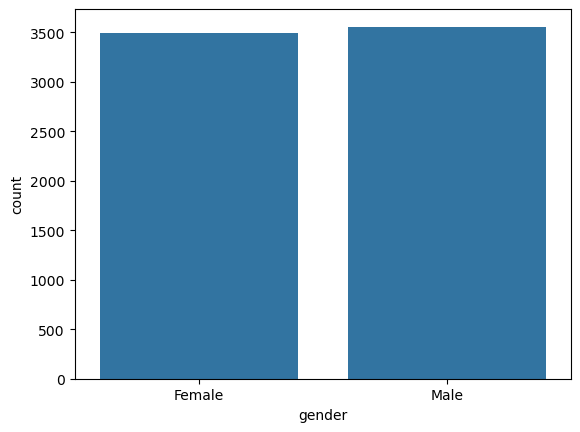

         Partner     Ratio
Partner                   
No          3641  51.69672
Yes         3402  48.30328
##########################################


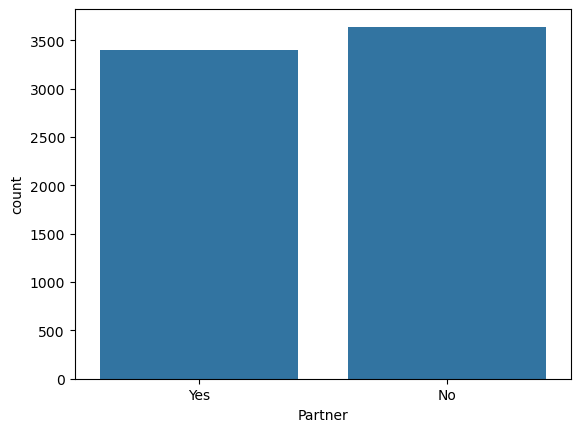

            Dependents      Ratio
Dependents                       
No                4933  70.041176
Yes               2110  29.958824
##########################################


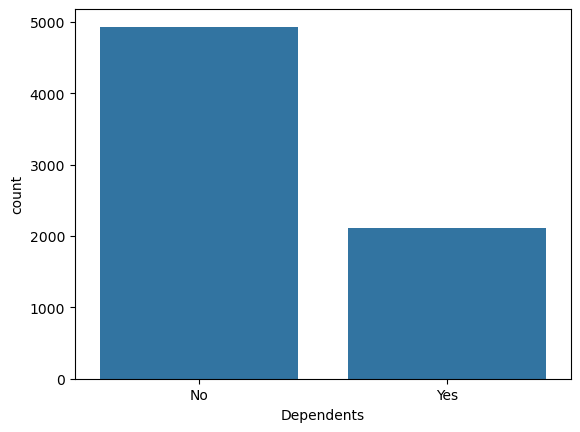

              PhoneService      Ratio
PhoneService                         
Yes                   6361  90.316626
No                     682   9.683374
##########################################


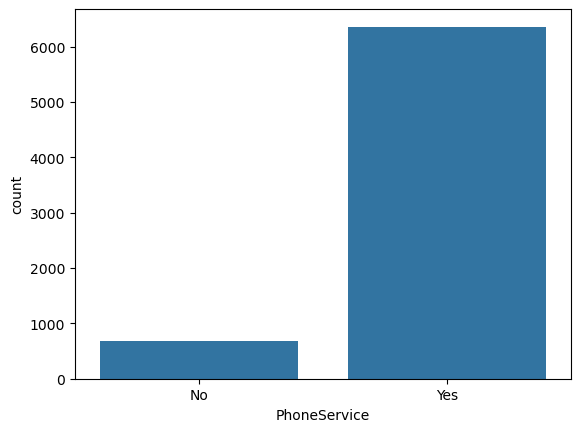

               MultipleLines      Ratio
MultipleLines                          
No                      4072  57.816271
Yes                     2971  42.183729
##########################################


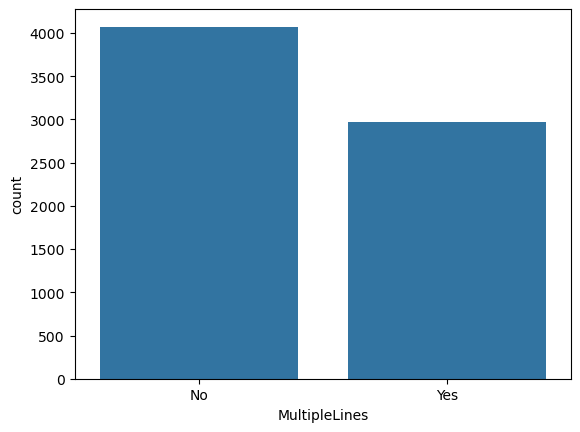

                 InternetService      Ratio
InternetService                            
Fiber optic                 3096  43.958540
DSL                         2421  34.374556
No                          1526  21.666903
##########################################


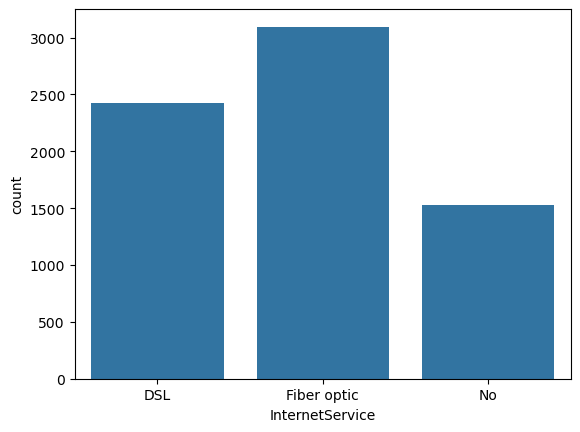

                OnlineSecurity      Ratio
OnlineSecurity                           
No                        5024  71.333239
Yes                       2019  28.666761
##########################################


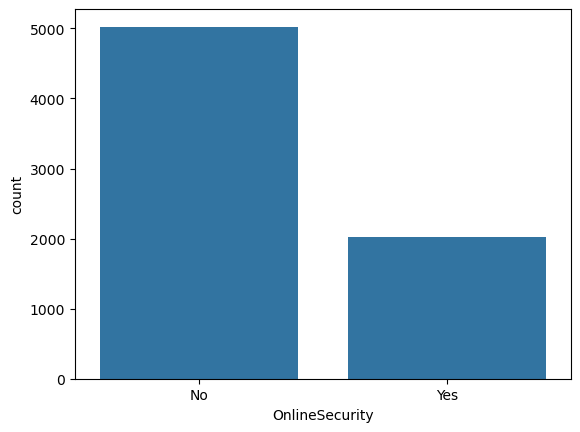

              OnlineBackup      Ratio
OnlineBackup                         
No                    4614  65.511856
Yes                   2429  34.488144
##########################################


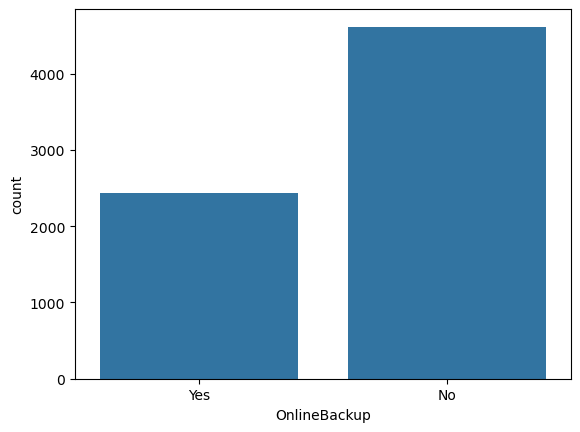

                  DeviceProtection      Ratio
DeviceProtection                             
No                            4621  65.611245
Yes                           2422  34.388755
##########################################


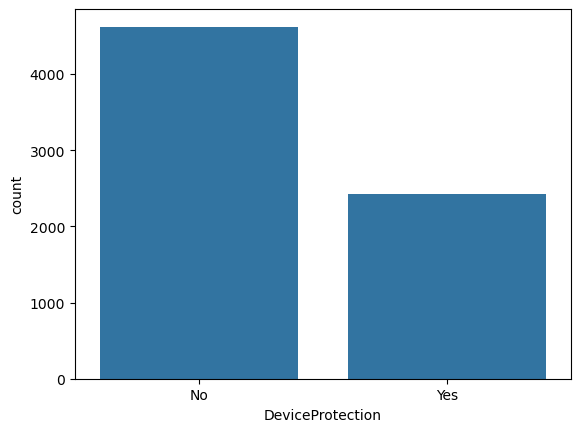

             TechSupport      Ratio
TechSupport                        
No                  4999  70.978276
Yes                 2044  29.021724
##########################################


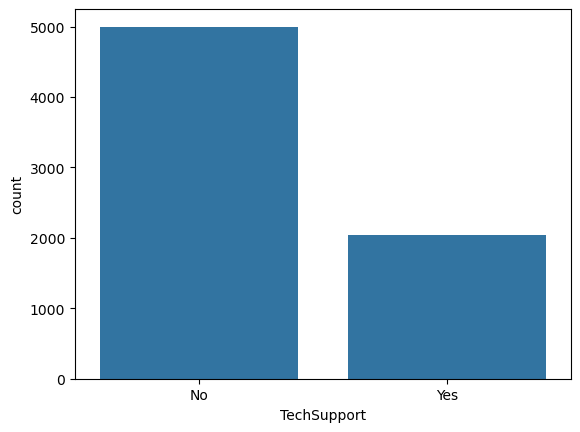

             StreamingTV      Ratio
StreamingTV                        
No                  4336  61.564674
Yes                 2707  38.435326
##########################################


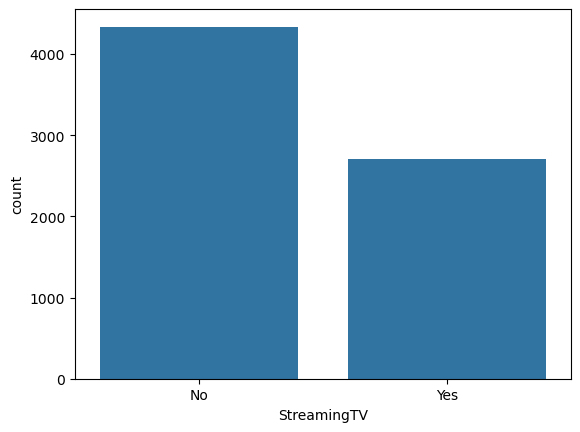

                 StreamingMovies      Ratio
StreamingMovies                            
No                          4311  61.209712
Yes                         2732  38.790288
##########################################


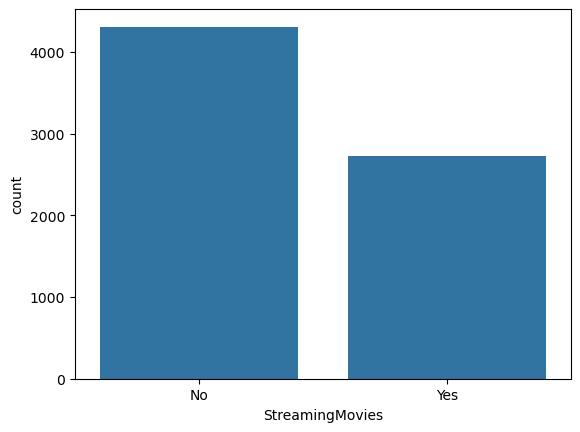

                Contract      Ratio
Contract                           
Month-to-month      3875  55.019168
Two year            1695  24.066449
One year            1473  20.914383
##########################################


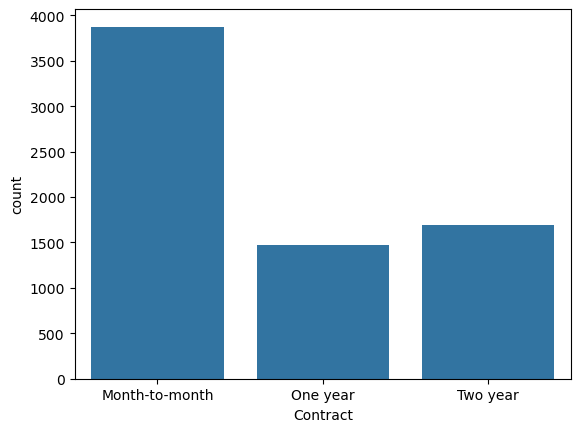

                  PaperlessBilling      Ratio
PaperlessBilling                             
Yes                           4171  59.221922
No                            2872  40.778078
##########################################


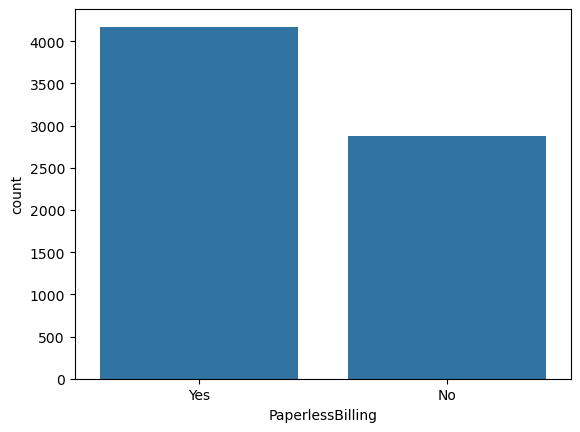

                           PaymentMethod      Ratio
PaymentMethod                                      
Electronic check                    2365  33.579441
Mailed check                        1612  22.887974
Bank transfer (automatic)           1544  21.922476
Credit card (automatic)             1522  21.610109
##########################################


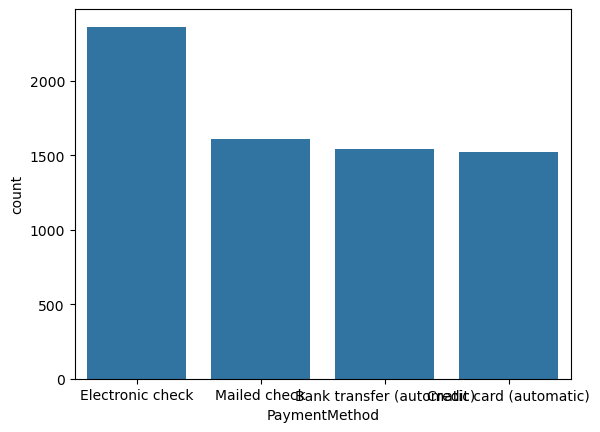

               SeniorCitizen      Ratio
SeniorCitizen                          
0                       5901  83.785319
1                       1142  16.214681
##########################################


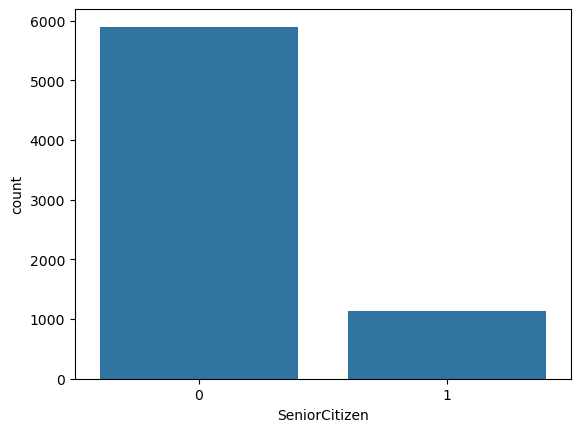

In [20]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

for col in cat_cols:
    cat_summary(df, col, plot=True)

#### Numeric Değişken Analizi

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
1%          1.000000
5%          1.000000
10%         2.000000
20%         6.000000
30%        12.000000
40%        20.000000
50%        29.000000
60%        40.000000
70%        50.000000
80%        60.000000
90%        69.000000
95%        72.000000
99%        72.000000
max        72.000000
Name: tenure, dtype: float64


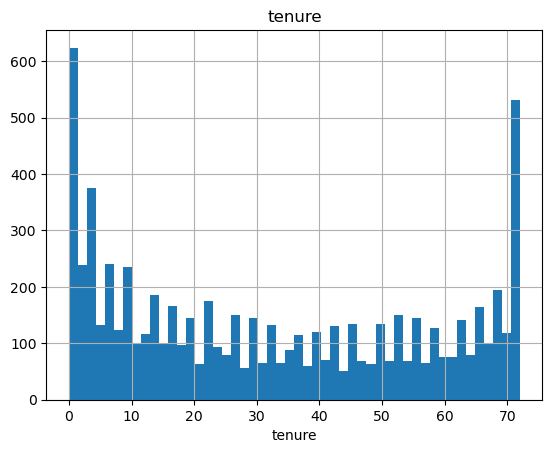

#####################################
count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
1%         19.200000
5%         19.650000
10%        20.050000
20%        25.050000
30%        45.850000
40%        58.830000
50%        70.350000
60%        79.100000
70%        85.500000
80%        94.250000
90%       102.600000
95%       107.400000
99%       114.729000
max       118.750000
Name: MonthlyCharges, dtype: float64


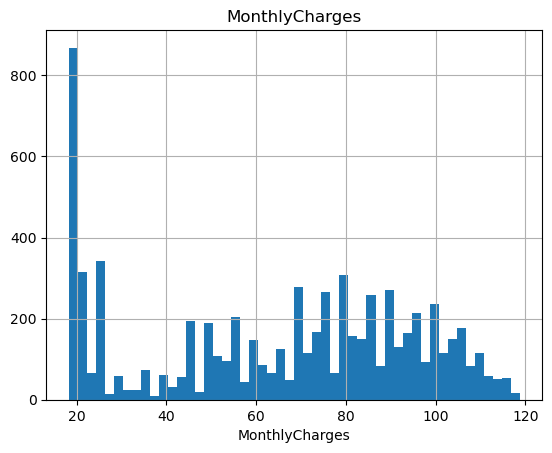

#####################################
count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
1%         19.900000
5%         49.605000
10%        84.600000
20%       267.070000
30%       551.995000
40%       944.170000
50%      1397.475000
60%      2048.950000
70%      3141.130000
80%      4475.410000
90%      5976.640000
95%      6923.590000
99%      8039.883000
max      8684.800000
Name: TotalCharges, dtype: float64


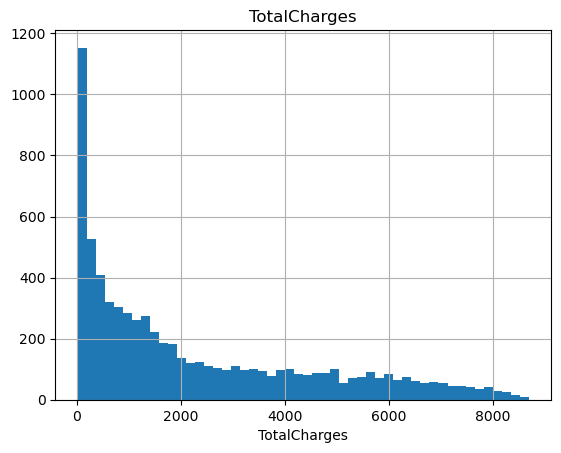

#####################################


In [22]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=50)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

    print("#####################################")


for col in num_cols:
    num_summary(df, col, True)

### Hedef Değişken Analizi

In [24]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")


for col in cat_cols:
    target_summary_with_cat(df,"Churn",col)

        TARGET_MEAN
gender             
Female     0.269209
Male       0.261603


         TARGET_MEAN
Partner             
No          0.329580
Yes         0.196649


            TARGET_MEAN
Dependents             
No             0.312791
Yes            0.154502


              TARGET_MEAN
PhoneService             
No               0.249267
Yes              0.267096


               TARGET_MEAN
MultipleLines             
No                0.250246
Yes               0.286099


                 TARGET_MEAN
InternetService             
DSL                 0.189591
Fiber optic         0.418928
No                  0.074050


                TARGET_MEAN
OnlineSecurity             
No                 0.313296
Yes                0.146112


              TARGET_MEAN
OnlineBackup             
No               0.291721
Yes              0.215315


                  TARGET_MEAN
DeviceProtection             
No                   0.286518
Yes                  0.225021


             TARGET_MEAN
Tech

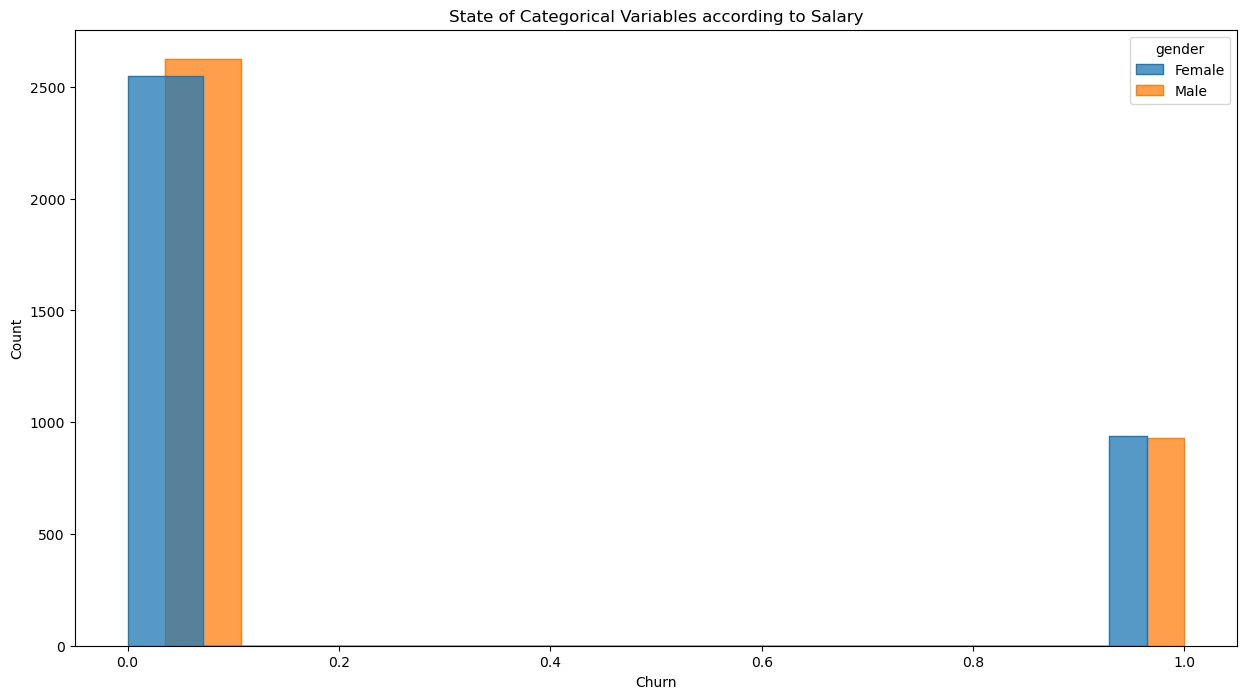

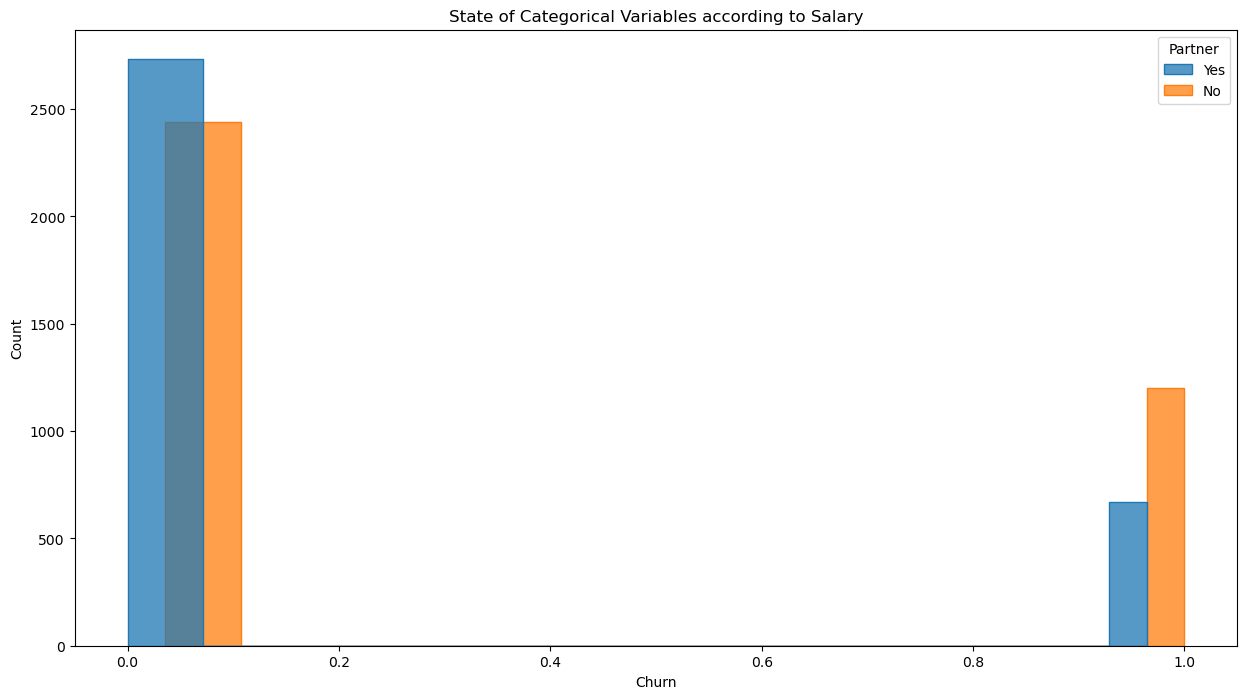

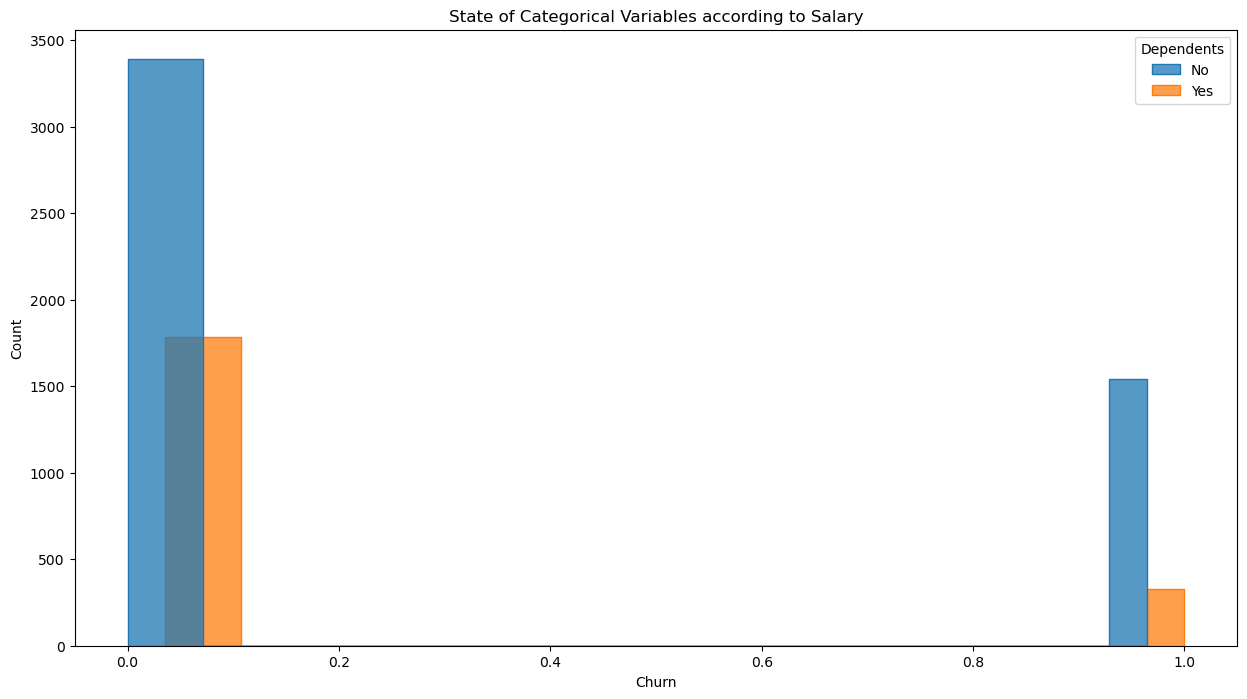

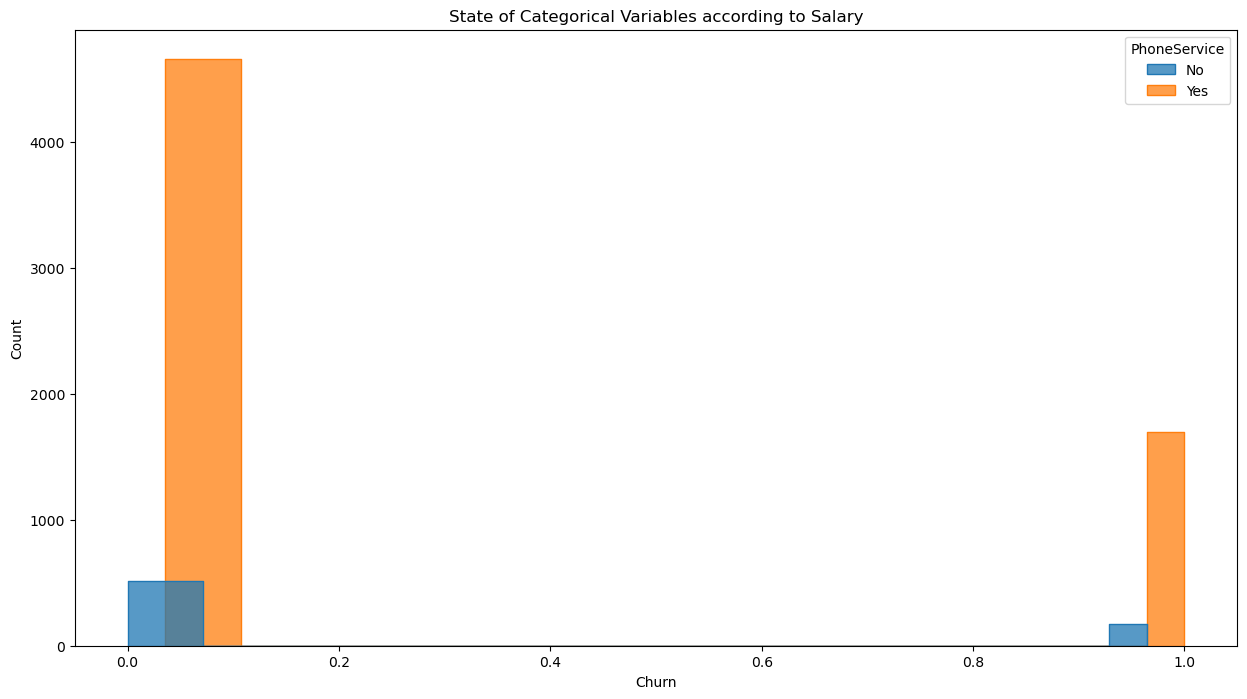

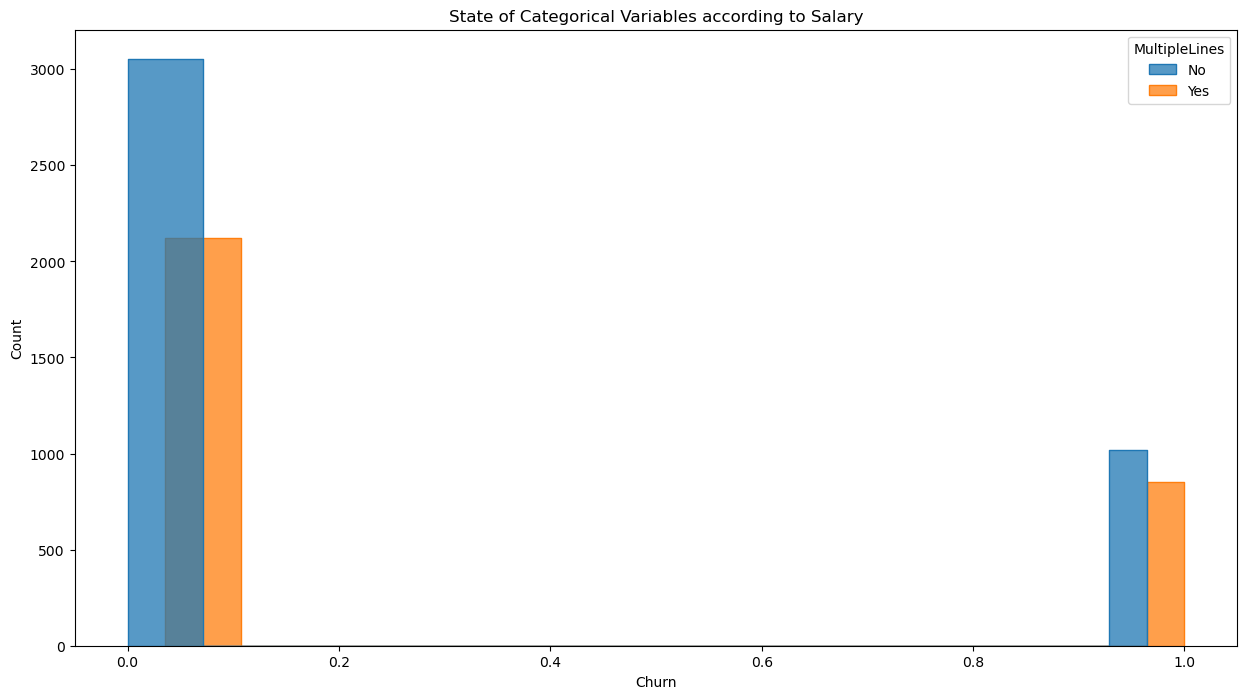

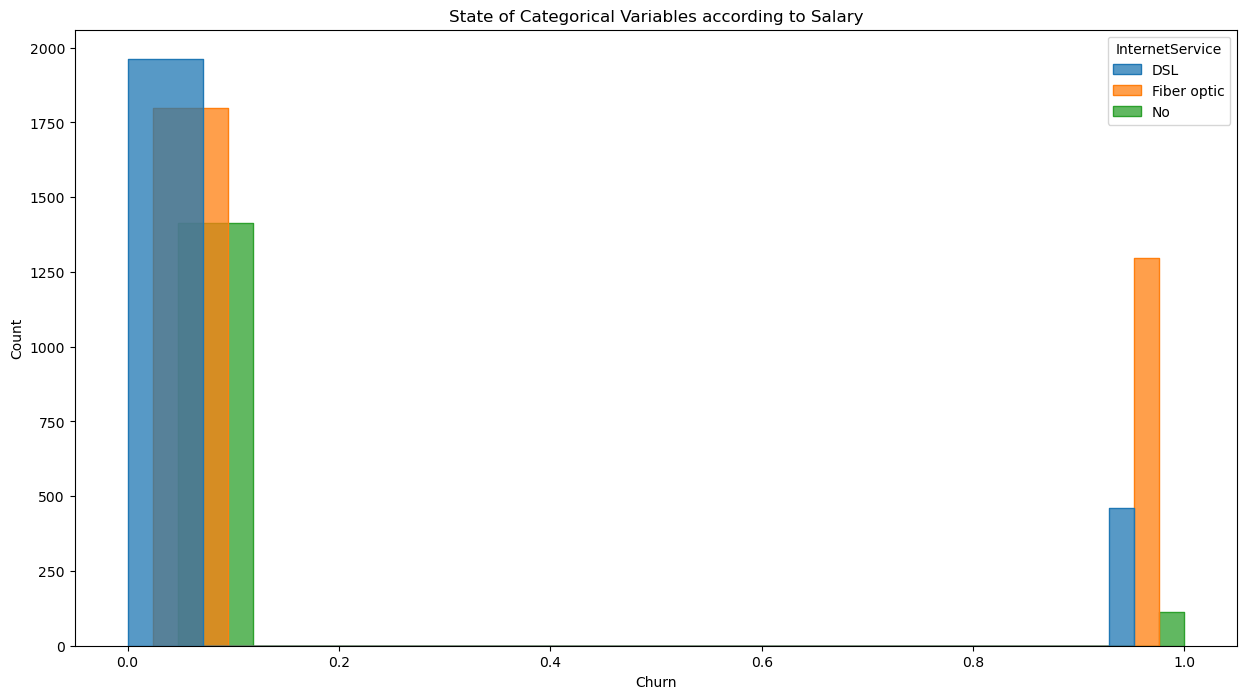

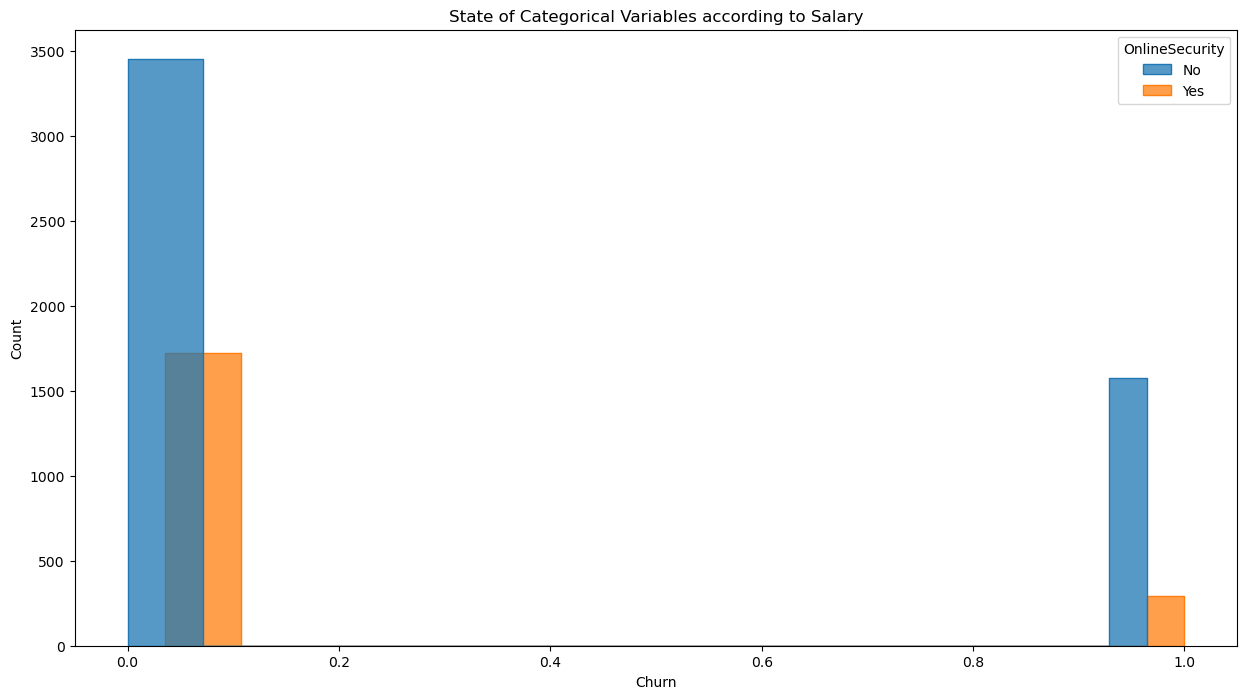

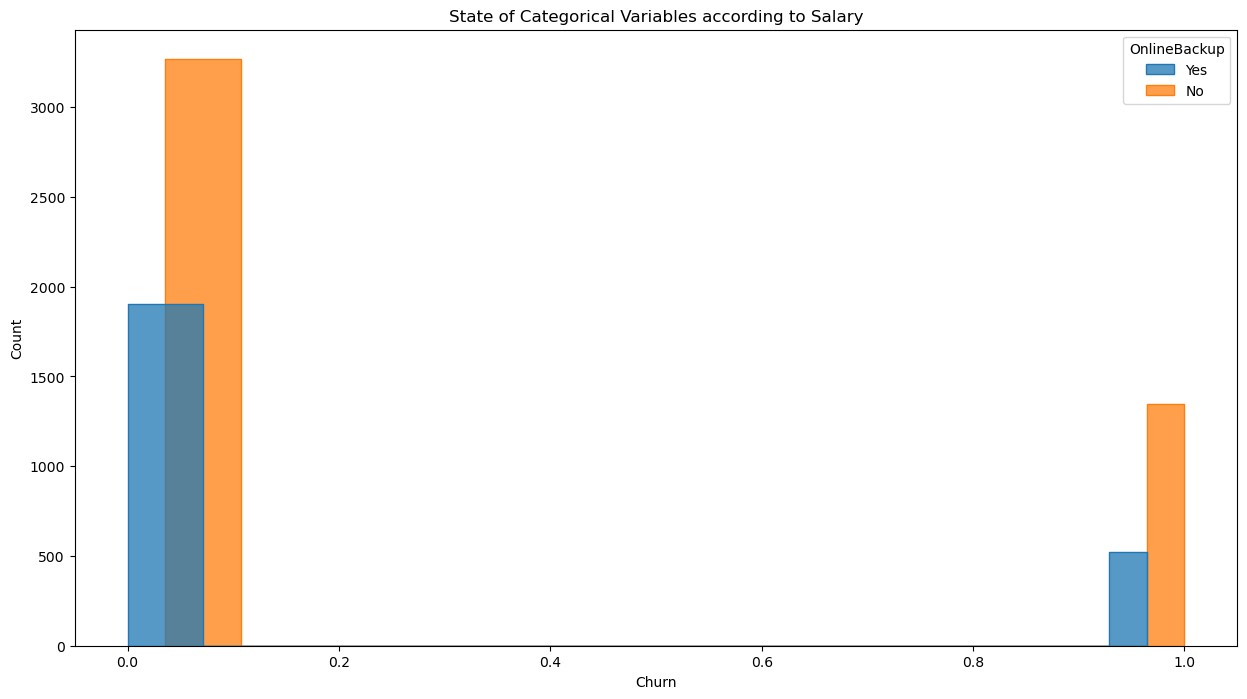

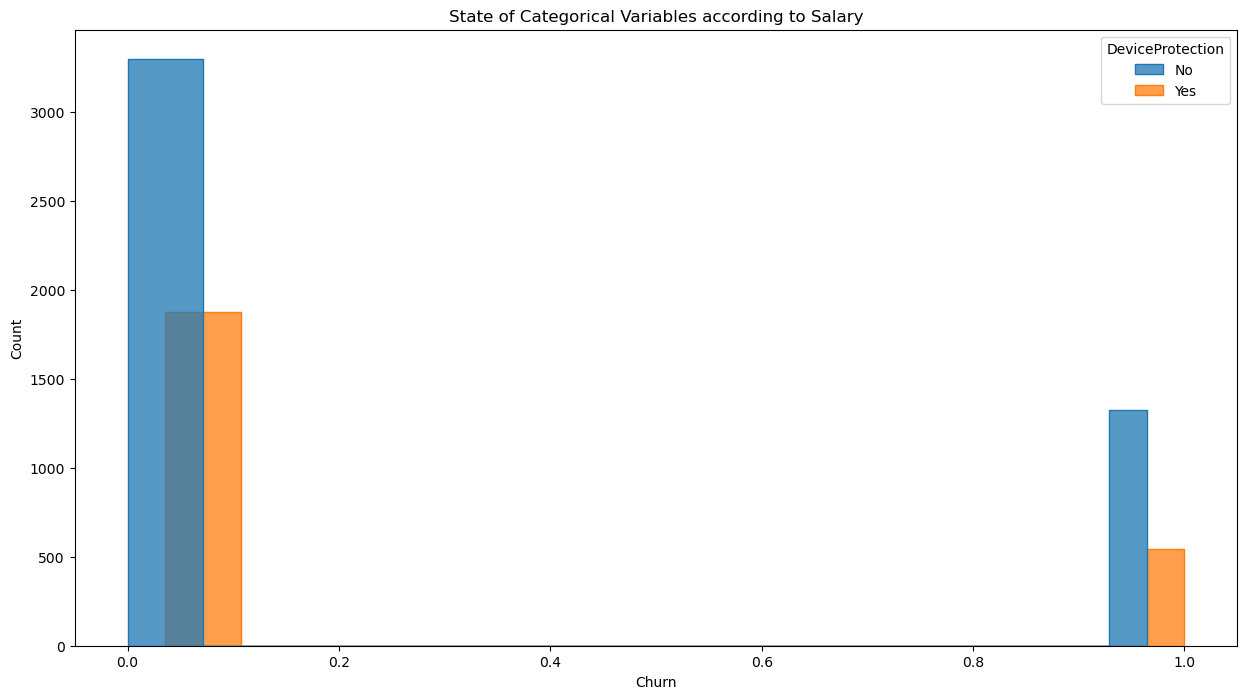

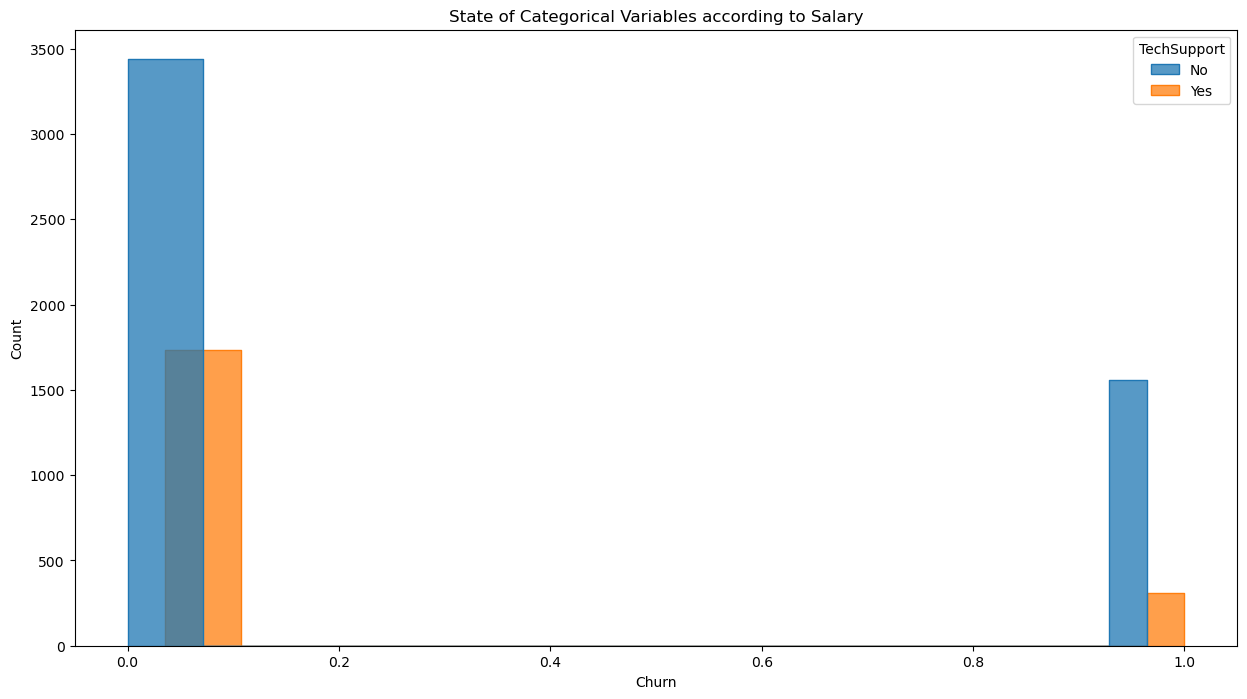

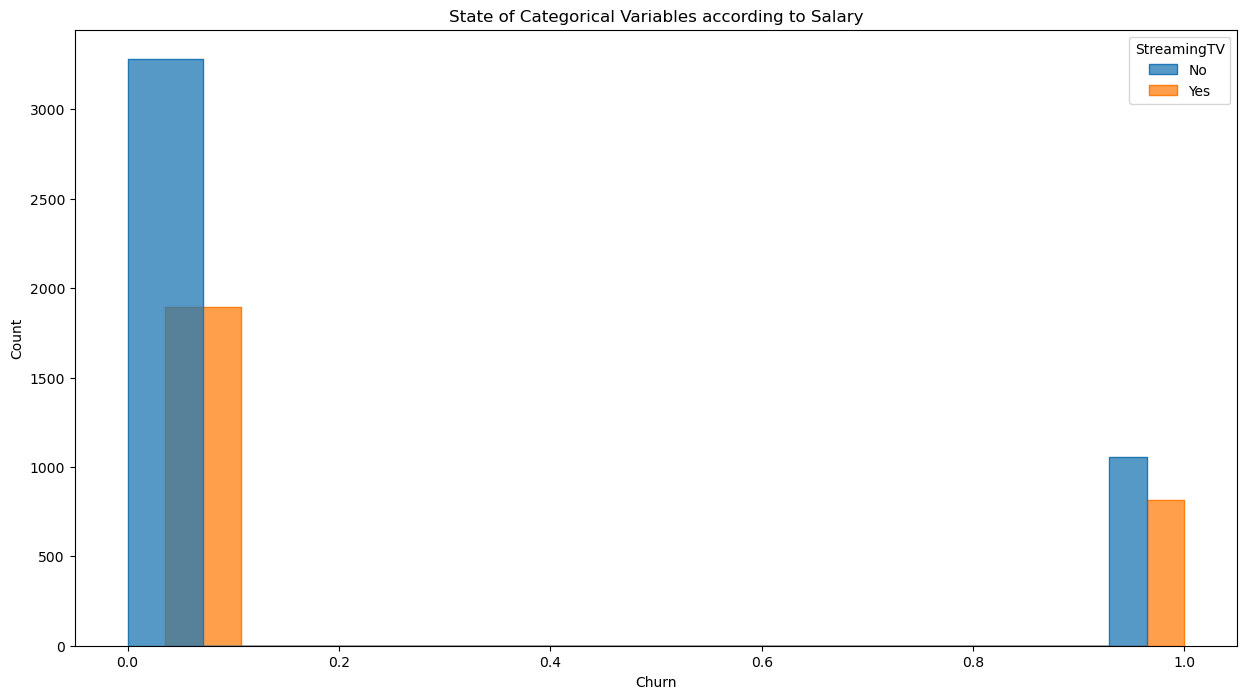

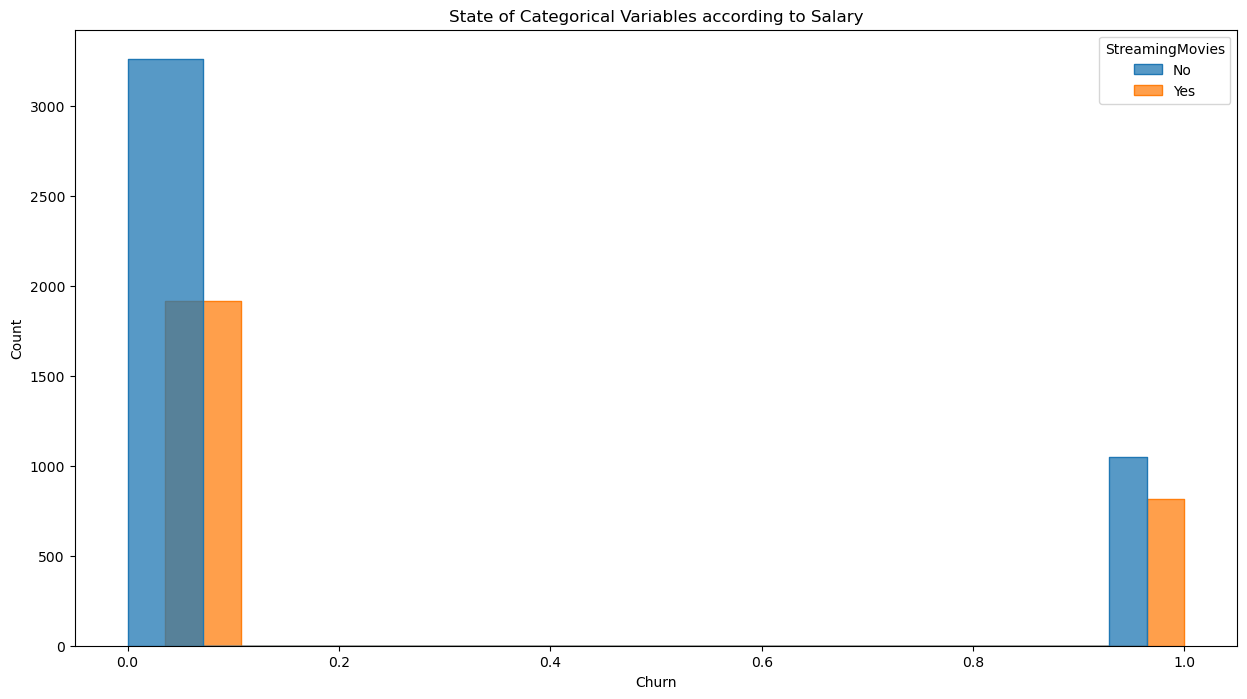

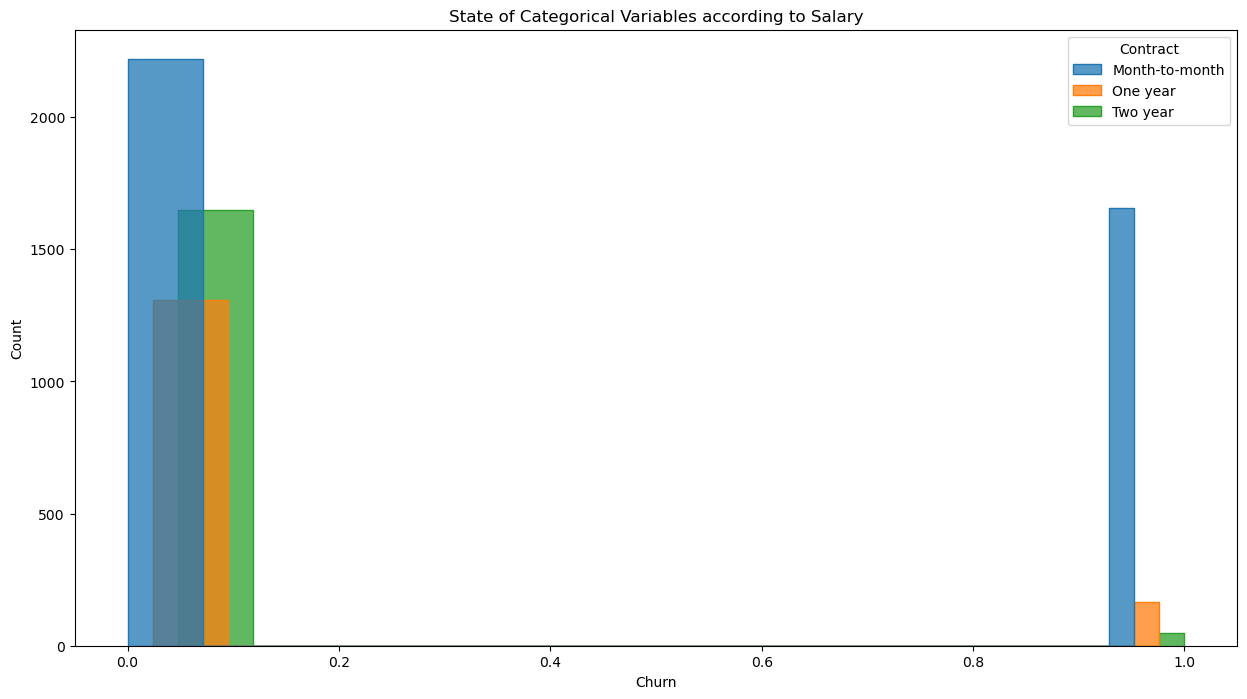

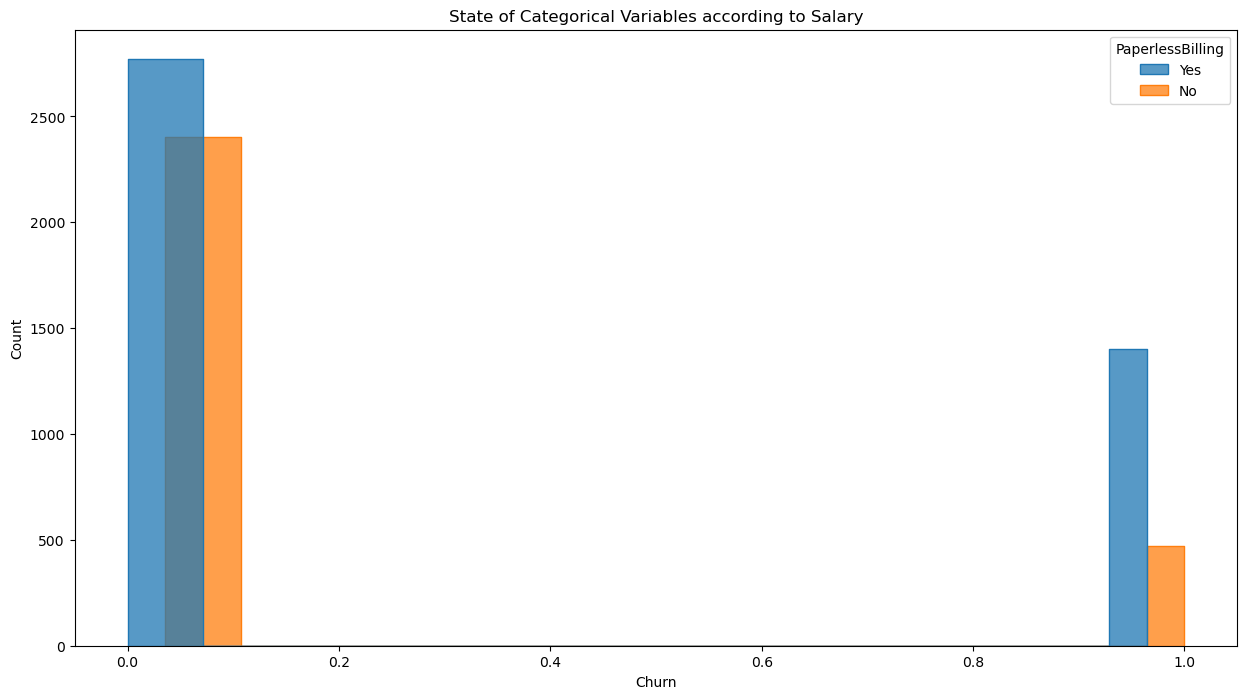

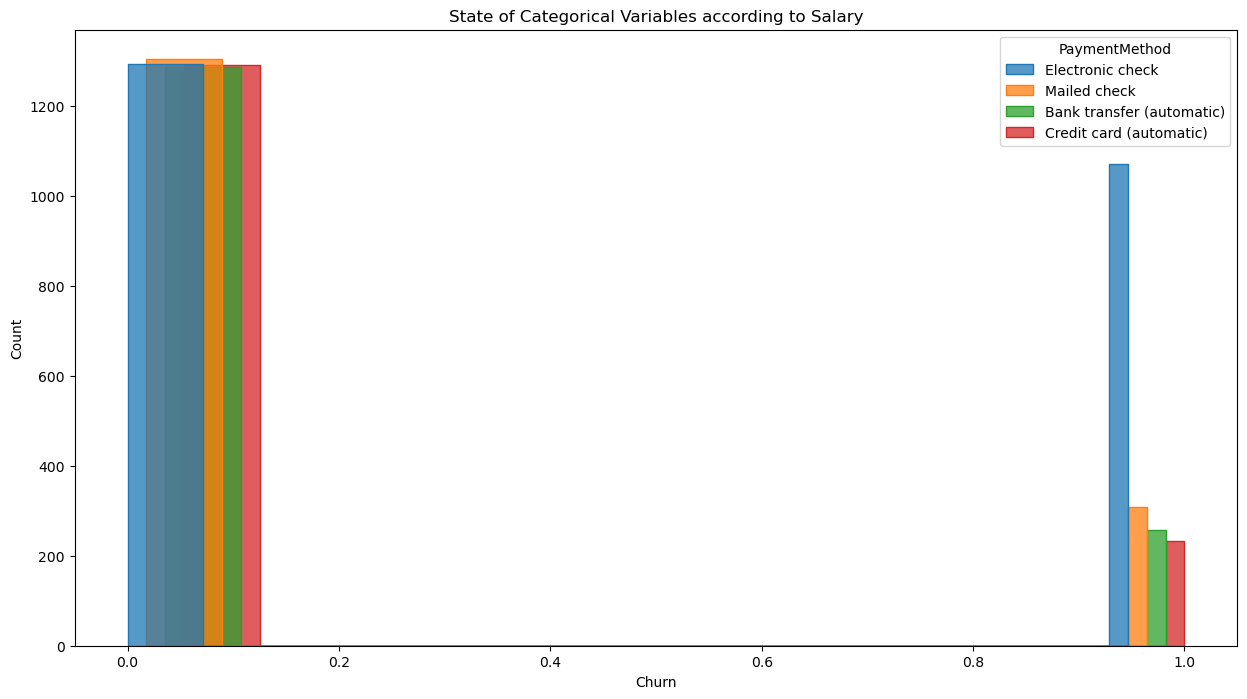

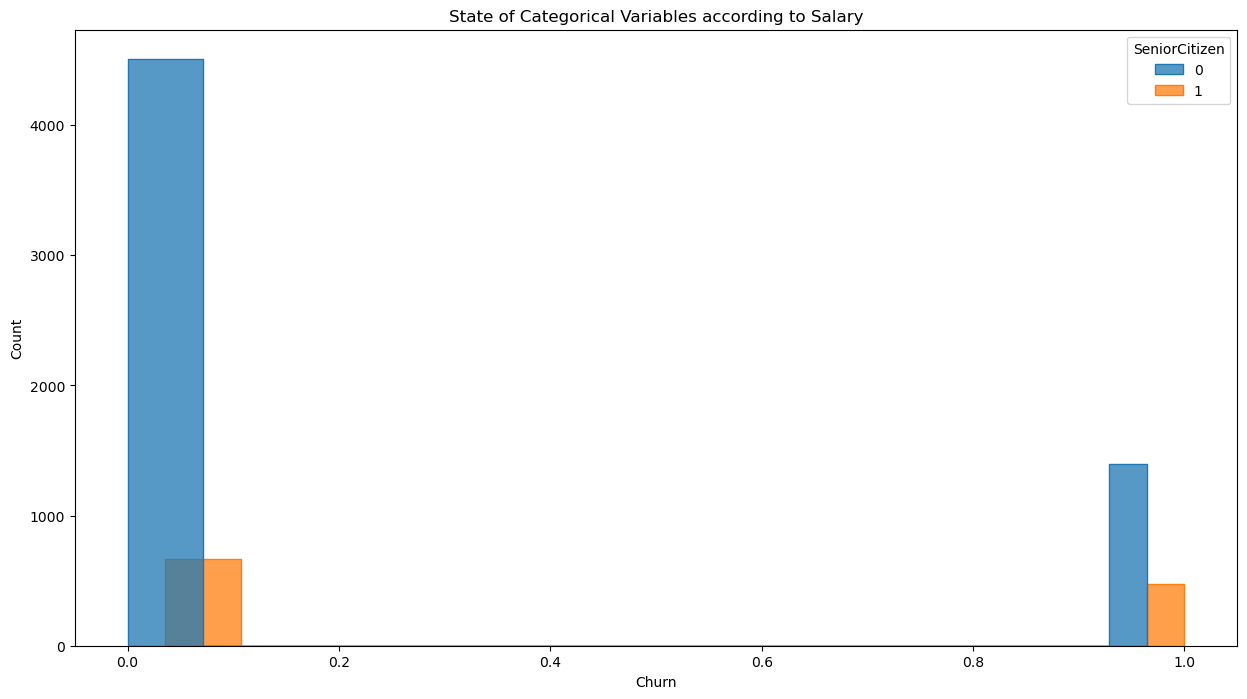

In [25]:
def target_vs_category_visual(dataframe,target, categorical_col):
    plt.figure(figsize=(15,8))
    sns.histplot(x=target,hue=categorical_col, data=dataframe,element="step",multiple="dodge")
    plt.title("State of Categorical Variables according to Salary")
    plt.show()

for col in cat_cols:
    target_vs_category_visual(df,"Churn",col)

### Kolerasyon Analizi

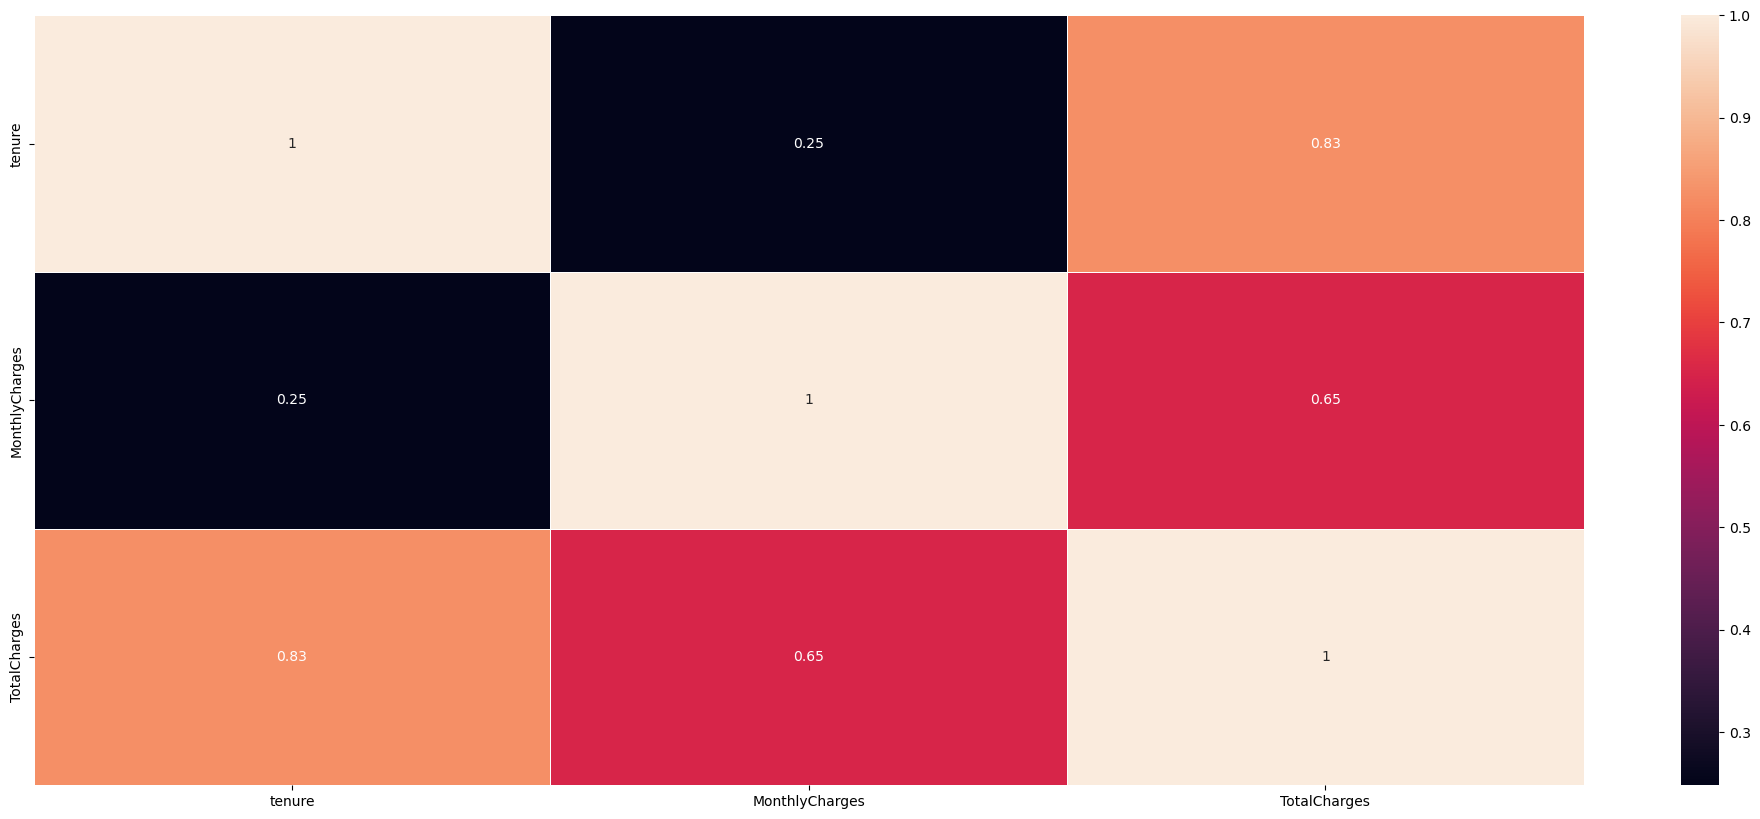

['TotalCharges']

In [27]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.8):
    numeric_df = dataframe.select_dtypes(include=[float, int])

    corr = numeric_df.corr()
    cor_matrix = corr.abs()
    
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    
    if plot:
        fig, ax = plt.subplots(figsize=(25,10)) 
        sns.heatmap(df[num_cols].corr(), annot=True, linewidths=.5, ax=ax)
        plt.show()
    
    return drop_list

high_correlated_cols(df, plot=True)

## Data Processing and Feature Engineering

In [29]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Aykırı Değer Analizi

In [32]:
def outlier_thresholds(dataframe, col_name, q1=0.1, q3=0.9):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [33]:
for col in num_cols:
    print("******" , col , "******")
    print(check_outlier(df, col))
    print("***********************")

****** tenure ******
False
***********************
****** MonthlyCharges ******
False
***********************
****** TotalCharges ******
False
***********************


### Eksik Değer Analizi

In [35]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [36]:
df.loc[df['TotalCharges'].isnull()]
# TotalCharges değeri null olan değerlerin tenure değerleri 0 yani abonelikleri yeni. Bu yüzden TotalCharges değerlerinin null veya nan olması normal

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
753,Male,0,No,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.25,NaN,0
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.75,NaN,0
1340,Female,0,Yes,Yes,0,No,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0
3331,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,19.85,NaN,0
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.35,NaN,0
4380,Female,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.00,NaN,0
5218,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,19.70,NaN,0
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,0


In [37]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)

### Feature Engineering

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [40]:
df['NEW_Number_Of_Service'] = (df[['PhoneService', 'InternetService', 'OnlineSecurity',
                                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                       'StreamingTV', 'StreamingMovies']]== 'Yes').sum(axis=1)
df['NEW_Price_Per_Service'] = df['MonthlyCharges'] / (df['NEW_Number_Of_Service'] + 1)
df['NEW_Avg_Price'] = df['TotalCharges'] / (df['tenure'] + 1)
df['NEW_Price_Increase'] = np.where(
    df['NEW_Avg_Price'] == 0, 
    0,  # Sıfıra bölme durumunda 0 değerini ata
    df['MonthlyCharges'] / df['NEW_Avg_Price']
)
df['NEW_tenure*MontlyCharges'] = df['tenure'] * df['MonthlyCharges']
df['NEW_Billing_Increase_Rate'] = np.where(
    df['NEW_Avg_Price'] == 0, 
    0,  # Sıfıra bölme durumunda 0 değerini ata
    (df['MonthlyCharges'] - df['NEW_Avg_Price']) / df['NEW_Avg_Price']
)

### Label Encoding ve One Hot Encoding

In [42]:
cat_cols, cat_but_car, num_cols = grab_col_names(df)

Observations: 7043
Variables: 26
cat_cols: 18
num_cols: 8
cat_but_car: 0
num_but_cat: 3


In [43]:
binary_cols = [col for col in cat_cols if len(df[col].unique()) == 2 and col not in ['Churn']]
binary_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'SeniorCitizen']

In [44]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

for col in binary_cols:
    label_encoder(df, col)

In [45]:
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["Churn", "NEW_Number_Of_Service"]]
cat_cols

['InternetService', 'Contract', 'PaymentMethod']

In [46]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df = one_hot_encoder(df, cat_cols, drop_first=True)

In [47]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,NEW_Number_Of_Service,NEW_Price_Per_Service,NEW_Avg_Price,NEW_Price_Increase,NEW_tenure*MontlyCharges,NEW_Billing_Increase_Rate,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,14.9250,14.925000,2.000000,29.85,1.000000,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,3,14.2375,53.985714,1.054909,1936.30,0.054909,False,False,True,False,False,False,True
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,3,13.4625,36.050000,1.493759,107.70,0.493759,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,3,10.5750,40.016304,1.057069,1903.50,0.057069,False,False,True,False,False,False,False
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,1,35.3500,50.550000,1.398615,141.40,0.398615,True,False,False,False,False,True,False


In [48]:
df.shape

(7043, 30)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int32  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int32  
 3   Dependents                             7043 non-null   int32  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int32  
 6   MultipleLines                          7043 non-null   int32  
 7   OnlineSecurity                         7043 non-null   int32  
 8   OnlineBackup                           7043 non-null   int32  
 9   DeviceProtection                       7043 non-null   int32  
 10  TechSupport                            7043 non-null   int32  
 11  Stre

## Feature Scaling

In [51]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 30
cat_cols: 22
num_cols: 8
cat_but_car: 0
num_but_cat: 22


In [52]:
num_cols

['tenure',
 'MonthlyCharges',
 'TotalCharges',
 'NEW_Price_Per_Service',
 'NEW_Avg_Price',
 'NEW_Price_Increase',
 'NEW_tenure*MontlyCharges',
 'NEW_Billing_Increase_Rate']

In [53]:
print(df[num_cols].isna().sum())  # NaN değerleri kontrol edin
print(np.isinf(df[num_cols]).sum())  # Sonsuz değerleri kontrol edin


tenure                       0
MonthlyCharges               0
TotalCharges                 0
NEW_Price_Per_Service        0
NEW_Avg_Price                0
NEW_Price_Increase           0
NEW_tenure*MontlyCharges     0
NEW_Billing_Increase_Rate    0
dtype: int64
tenure                       0
MonthlyCharges               0
TotalCharges                 0
NEW_Price_Per_Service        0
NEW_Avg_Price                0
NEW_Price_Increase           0
NEW_tenure*MontlyCharges     0
NEW_Billing_Increase_Rate    0
dtype: int64


In [54]:
scaler = RobustScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,NEW_Number_Of_Service,NEW_Price_Per_Service,NEW_Avg_Price,NEW_Price_Increase,NEW_tenure*MontlyCharges,NEW_Billing_Increase_Rate,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-0.608696,0,0,0,1,0,0,0,0,1,-0.745170,-0.402798,0,1,-0.061308,-0.782675,8.416299,-0.402037,8.416299,False,False,False,False,False,True,False
1,1,0,0,0,0.108696,1,0,1,0,1,0,0,0,0,-0.246550,0.146087,0,3,-0.136479,-0.118256,0.106035,0.159989,0.106035,False,False,True,False,False,False,True
2,1,0,0,0,-0.586957,1,0,1,1,0,0,0,0,1,-0.303588,-0.379687,1,3,-0.221217,-0.423341,3.964878,-0.379087,3.964878,False,False,False,False,False,False,True
3,1,0,0,0,0.347826,0,0,1,0,1,1,0,0,0,-0.516099,0.131698,0,3,-0.536935,-0.355874,0.125032,0.150320,0.125032,False,False,True,False,False,False,False
4,0,0,0,0,-0.586957,1,0,0,0,0,0,0,0,1,0.006440,-0.366848,1,1,2.171949,-0.176697,3.128274,-0.369152,3.128274,True,False,False,False,False,True,False


## Modelleme

### Base Model Testleri

In [57]:
X = df.drop(["Churn"], axis=1)
y = df['Churn']

models = [('LR', LogisticRegression()),
          ('CART', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ('GBM', GradientBoostingClassifier()),
          ("XGBoost", XGBClassifier()),
          ("LightGBM", LGBMClassifier(verbose=-1)),
          ("CatBoost", CatBoostClassifier(verbose=False))]

for name, classifier in models:
    print("\n*****", name, "*****")
    cv_results = cross_validate(classifier, X, y, cv=5, scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])
    print("Accuracy: ", cv_results['test_accuracy'].mean())
    print("Precision: ", cv_results['test_precision'].mean())
    print("Recall: ", cv_results['test_recall'].mean())
    print("F1 Score: ", cv_results['test_f1'].mean())
    print("Roc Auc Score: ", cv_results['test_roc_auc'].mean())


***** LR *****
Accuracy:  0.807042994709336
Precision:  0.6690481355486007
Recall:  0.5403922524408251
F1 Score:  0.5976956361818045
Roc Auc Score:  0.8502026205906018

***** CART *****
Accuracy:  0.7224243297954708
Precision:  0.47861804649113643
Recall:  0.5024057002766985
F1 Score:  0.4900965974420869
Roc Auc Score:  0.6533404093639126

***** RF *****
Accuracy:  0.7919934350603265
Precision:  0.6439744973760259
Recall:  0.4847643761379766
F1 Score:  0.5530386473179308
Roc Auc Score:  0.8234201245558733

***** GBM *****
Accuracy:  0.8007944060907157
Precision:  0.6595676471559703
Recall:  0.51524852690284
F1 Score:  0.5785300400182269
Roc Auc Score:  0.8445633933129967

***** XGBoost *****
Accuracy:  0.7819139541260726
Precision:  0.6078740352537446
Recall:  0.5040214477211796
F1 Score:  0.5510116663907388
Roc Auc Score:  0.8195532028343859

***** LightGBM *****
Accuracy:  0.7966787171753016
Precision:  0.6444285259085769
Recall:  0.5232699172771716
F1 Score:  0.5774586279295106
Roc

### En iyi 4 Model Üzerinde Hiperparametre Optimizasyonu

#### Logistic Regression

In [60]:
lr_model = LogisticRegression()
lr_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [61]:
lr_params = {"C": [0.001, 0.01, 0.1, 1, 10, 100],
            "max_iter": [100, 200, 500, 1000],
            "class_weight": ["None", "balanced"]}

In [62]:
lr_best_model = GridSearchCV(lr_model, lr_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [63]:
lr_best_model.best_params_

{'C': 0.001, 'class_weight': 'balanced', 'max_iter': 100}

In [64]:
lr_best_model.best_score_

0.7749546341699464

In [65]:
lr_final = lr_model.set_params(**lr_best_model.best_params_, random_state=17).fit(X, y)


cv_results = cross_validate(lr_final, X, y, cv=10, scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])

print("Accuracy: ", cv_results['test_accuracy'].mean())
print("Precision: ", cv_results['test_precision'].mean())
print("Recall: ", cv_results['test_recall'].mean())
print("F1 Score: ", cv_results['test_f1'].mean())
print("Roc Auc Score: ", cv_results['test_roc_auc'].mean())

#***** LR *****
#Accuracy:  0.807042994709336
#Precision:  0.6690481355486007
#Recall:  0.5403922524408251
#F1 Score:  0.5976956361818045
#Roc Auc Score:  0.8502026205906018

Accuracy:  0.7726831479690522
Precision:  0.5539566321185784
Recall:  0.7399890748088092
F1 Score:  0.6334214904449547
Roc Auc Score:  0.8373312201469834


#### GBM

In [67]:
gbm_model = GradientBoostingClassifier()
gbm_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [68]:
gbm_params = {"learning_rate": [0.01, 0.1, 1],
             "max_depth": [2, 3, 5],
             "n_estimators": [50, 100, 200, 400]}

In [69]:
gbm_best_model = GridSearchCV(gbm_model, gbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [70]:
gbm_best_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [71]:
gbm_best_model.best_score_

0.8006523606361702

In [72]:
gbm_final = gbm_model.set_params(**gbm_best_model.best_params_, random_state=17).fit(X, y)


cv_results = cross_validate(gbm_final, X, y, cv=10, scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])

print("Accuracy: ", cv_results['test_accuracy'].mean())
print("Precision: ", cv_results['test_precision'].mean())
print("Recall: ", cv_results['test_recall'].mean())
print("F1 Score: ", cv_results['test_f1'].mean())
print("Roc Auc Score: ", cv_results['test_roc_auc'].mean())

#***** GBM *****
#Accuracy:  0.8007944060907157
#Precision:  0.6595676471559703
#Recall:  0.51524852690284
#F1 Score:  0.5785300400182269
#Roc Auc Score:  0.8446171369413982

Accuracy:  0.8006530061250807
Precision:  0.6613195657690839
Recall:  0.5131361048818356
F1 Score:  0.5772167614649228
Roc Auc Score:  0.8448768090560526


#### LightGBM

In [74]:
lgbm_model = LGBMClassifier()
lgbm_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [75]:
lgbm_params = {"colsample_bytree": [0.4, 0.7, 1],
              "learning_rate": [0.01, 0.1, 1],
              "n_estimators": [50, 100, 200, 500, 1000],
              "min_child_samples": [10, 20, 30]}

In [76]:
lgbm_best_model = GridSearchCV(lgbm_model, lgbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


In [77]:
lgbm_best_model.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.01,
 'min_child_samples': 30,
 'n_estimators': 500}

In [78]:
lgbm_best_model.best_score_

0.8039197085295825

In [79]:
lgbm_final = lgbm_model.set_params(**lgbm_best_model.best_params_, random_state=17).fit(X, y)


cv_results = cross_validate(lgbm_final, X, y, cv=10, scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])

print("Accuracy: ", cv_results['test_accuracy'].mean())
print("Precision: ", cv_results['test_precision'].mean())
print("Recall: ", cv_results['test_recall'].mean())
print("F1 Score: ", cv_results['test_f1'].mean())
print("Roc Auc Score: ", cv_results['test_roc_auc'].mean())

#***** LightGBM *****
#Accuracy:  0.7966787171753016
#Precision:  0.6444285259085769
#Recall:  0.5232699172771716
#F1 Score:  0.5774586279295106
#Roc Auc Score:  0.833858885307768

Accuracy:  0.8029233156028368
Precision:  0.6635282089290007
Recall:  0.5232907825886952
F1 Score:  0.5847557978332378
Roc Auc Score:  0.8452598393426187


#### CatBoost

In [81]:
cat_boost_model = CatBoostClassifier(verbose=False)
cat_boost_model.get_params()

{'verbose': False}

In [82]:
cat_boost_params = {"iterations": [200, 500, 1000],
                   "learning_rate": [0.01, 0.1, 1],
                   "depth": [3, 6, 8]}

In [83]:
cat_boost_best_model = GridSearchCV(cat_boost_model, cat_boost_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [84]:
cat_boost_best_model.best_params_

{'depth': 6, 'iterations': 1000, 'learning_rate': 0.01}

In [85]:
cat_boost_best_model.best_score_

0.8040615523582166

In [86]:
cat_boost_final = cat_boost_model.set_params(**cat_boost_best_model.best_params_, random_state=17).fit(X, y)


cv_results = cross_validate(cat_boost_final, X, y, cv=10, scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])

print("Accuracy: ", cv_results['test_accuracy'].mean())
print("Precision: ", cv_results['test_precision'].mean())
print("Recall: ", cv_results['test_recall'].mean())
print("F1 Score: ", cv_results['test_f1'].mean())
print("Roc Auc Score: ", cv_results['test_roc_auc'].mean())

#***** CatBoost *****
#Accuracy:  0.7976735394218981
#Precision:  0.6522221453674122
#Recall:  0.5093690413040673
#F1 Score:  0.571936769677748
#Roc Auc Score:  0.8407116997681283

Accuracy:  0.8054783204384268
Precision:  0.6712768542612875
Recall:  0.5243631763555862
F1 Score:  0.5883264495525745
Roc Auc Score:  0.8472988194294887


## Feature Importance

In [88]:
def plot_logistic_importance(model, features, save=False):
    feature_imp = pd.DataFrame({
        'Value': np.abs(model.coef_[0]), 
        'Feature': features.columns
    })
    feature_imp = feature_imp.sort_values(by="Value", ascending=False)

    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp)
    plt.title('Logistic Regression Feature Importance')
    plt.tight_layout()
    plt.show()
    
    if save:
        plt.savefig('logistic_importances.png')

In [89]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

### Logistic Regression

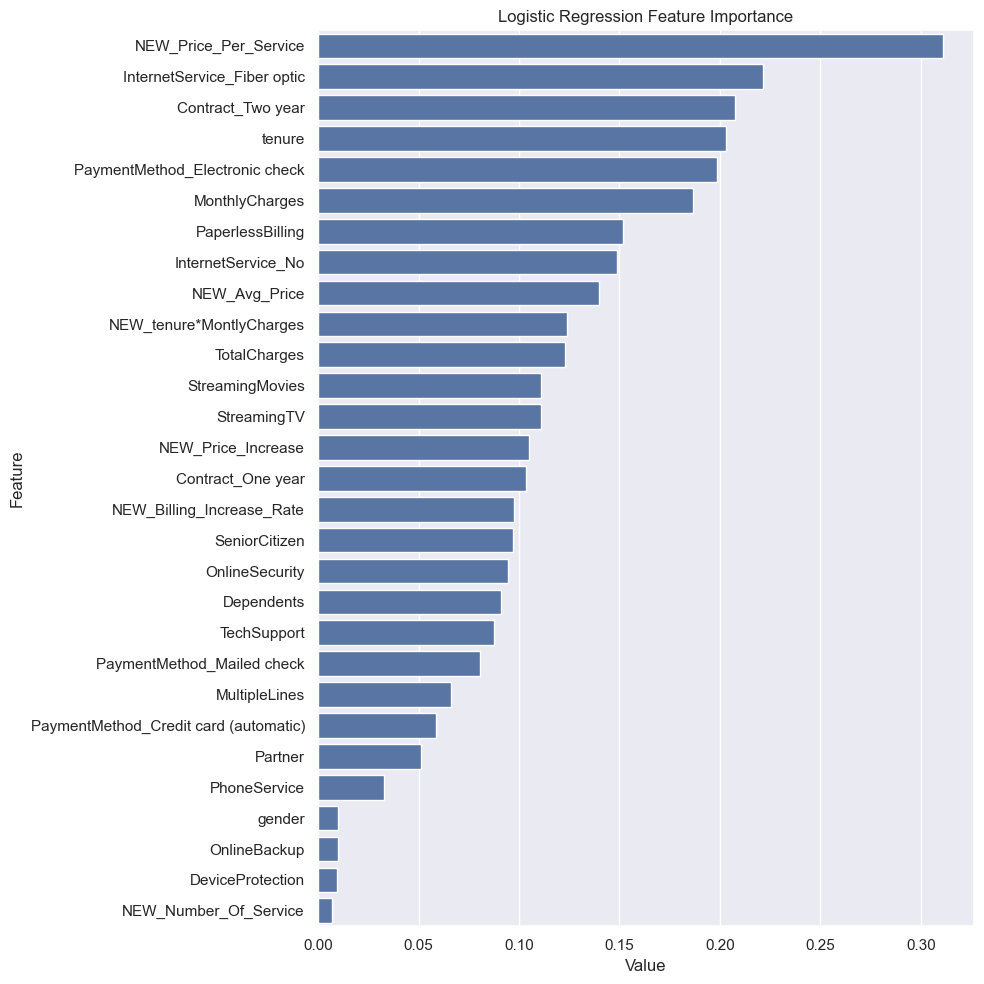

In [90]:
plot_logistic_importance(lr_final, X)

### GBM

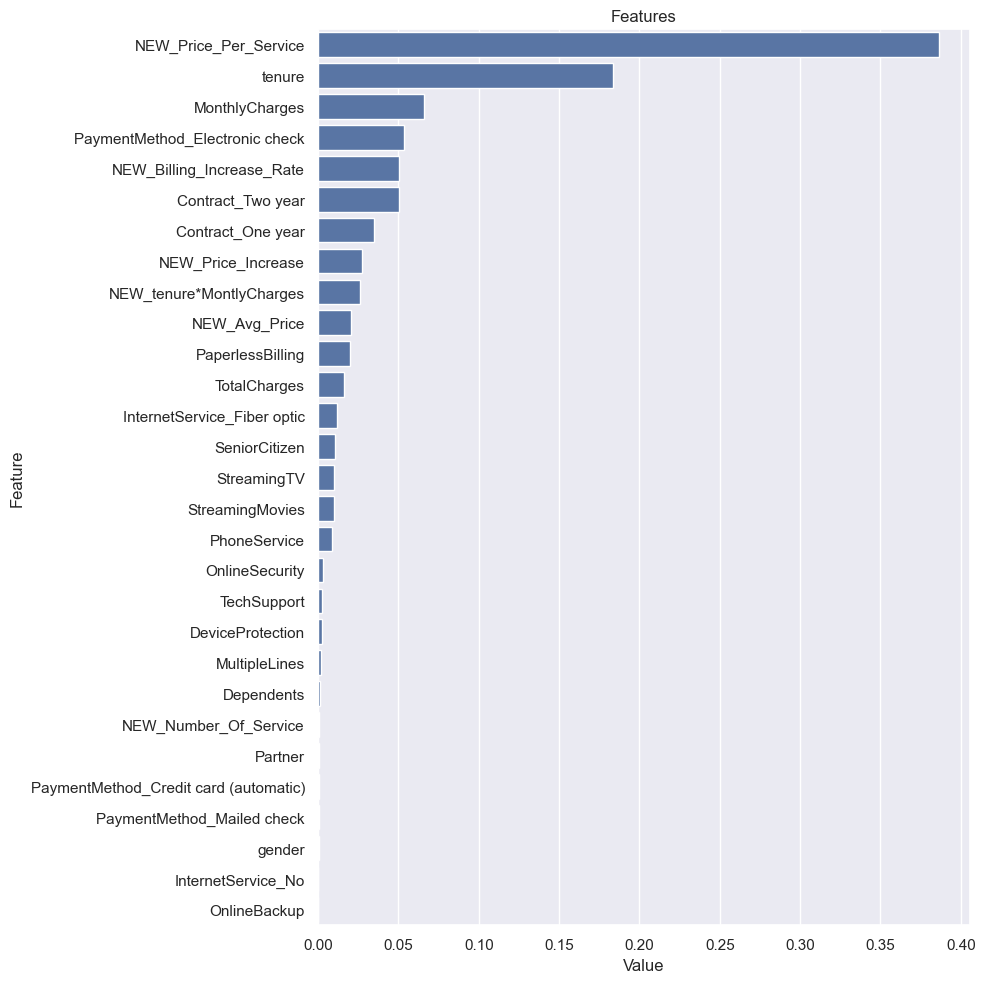

In [91]:
plot_importance(gbm_final, X)

### LightGBM

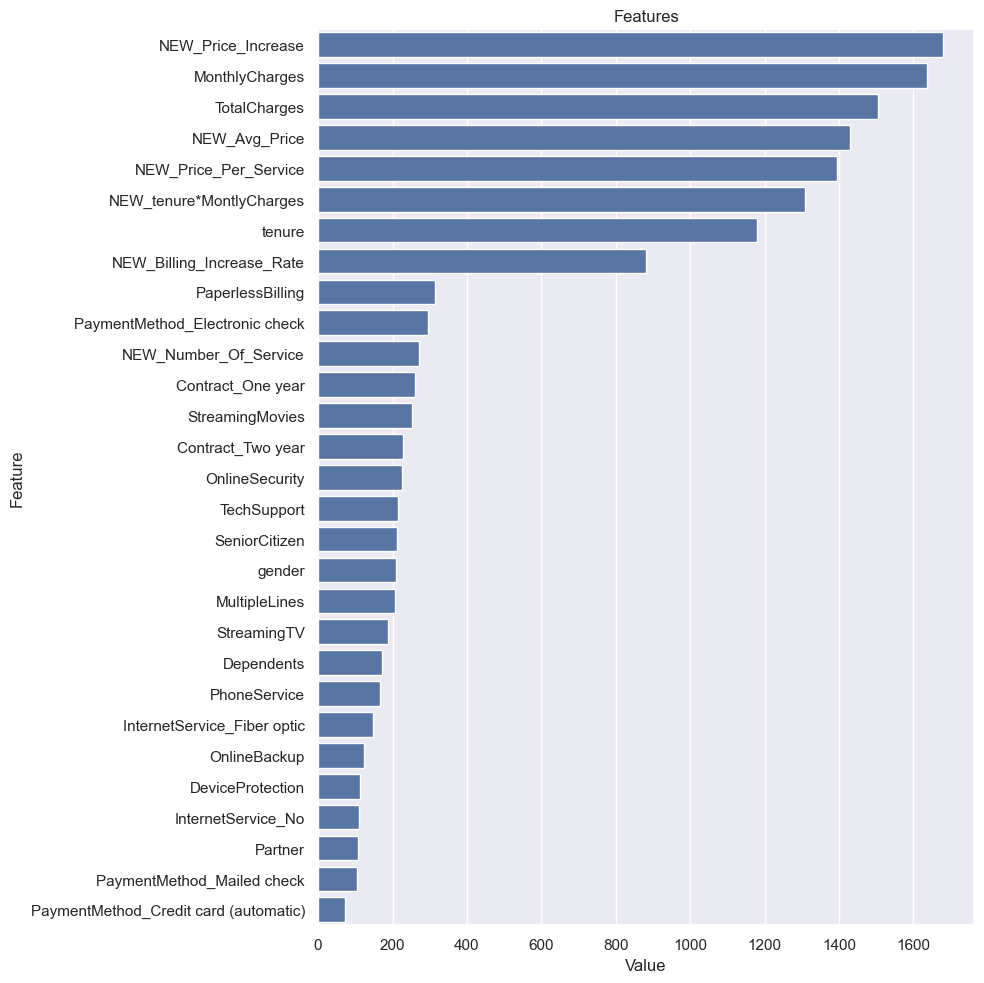

In [92]:
plot_importance(lgbm_final, X)

### CatBoost

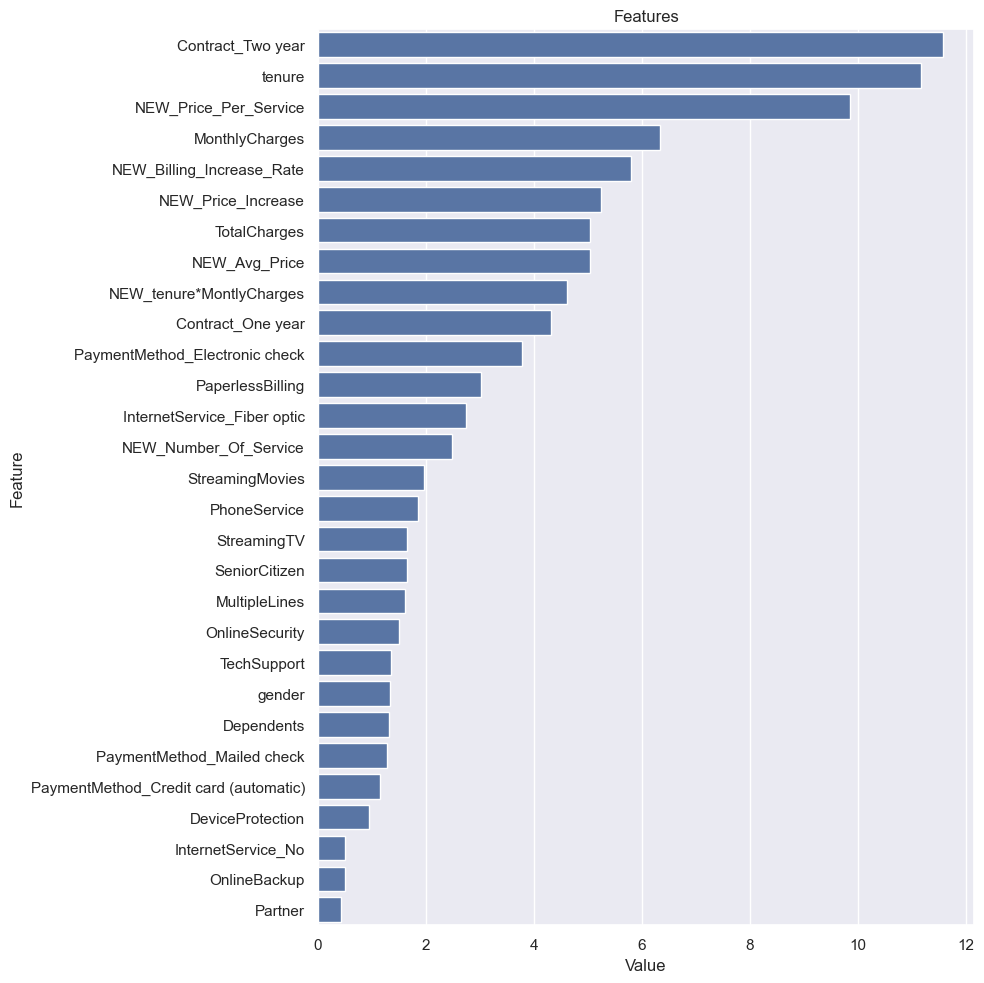

In [93]:
plot_importance(cat_boost_final, X)